In [1]:
# %matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, RidgeCV
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    roc_curve, r2_score, mean_absolute_error, mean_squared_error,
    auc
)
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
import mlflow
from scipy import stats
import math
from equipy.fairness import FairWasserstein
from equipy.metrics import unfairness
from scipy.stats import kstest, ks_2samp, norm
from tqdm import tqdm
import matplotlib.patches as mpatches
from scipy.stats import kstest
from matplotlib.ticker import MaxNLocator

#Import useful functions
from models_and_metrics import *
from synthetic_data import *


### __Parameters' initialization__

In [2]:
X_features=['X_0', 'X_1','X_2','X_3'] 

In [3]:
models = ['y_pred_fair', 'y_input_reg', 'y_score_equipy', 'y_pred_riken', 'y_pred_bias']
metrics = ['r2', 'mae', 'rmse', 'unfairness_W2', 'unfairness_W1', 'ks_stat','beta_0','beta','gamma',
            'fair_intercept_1_NoStd', 'fair_intercept_2_NoStd', 'beta_1_NoStd','beta_2_NoStd', 
            'fair_intercept_1_Std', 'fair_intercept_2_Std', 'beta_1_Std','beta_2_Std',
            'riken_intercept_Std']


In [4]:
current_params = {
    'y': 'Y',
    'S_variable': 'S',
    'additional_s': 0,
    'tho': 0.6,
    'nb_features': 5,
    'nb_obs': 20000,
    'n_simulations': 1,
    'random_seed': 7,
    't_unfair': 0,
    't_correl':0
}

## 1) __No direct bias__ experiment

In [5]:
no_bias_params = current_params.copy()
no_bias_params.update({
    'random_seed': 7,
    't_unfair': 0,  
    'T_mean': 0,
    'T_std': 0,
    't_correl':0
})
no_bias_params_values = [0]

In [6]:
t_results_no_bias, test_dataset_no_bias=Data.run_experiment('t_unfair', no_bias_params_values, no_bias_params, True,False,True)
all_results, results_df_exp, test_dataset,pool_dataset, param_dictionnary=Data.run_experiment('t_unfair', no_bias_params_values, no_bias_params, False,False,True)

Processing t_unfair: 100%|██████████| 1/1 [00:04<00:00,  4.84s/it]


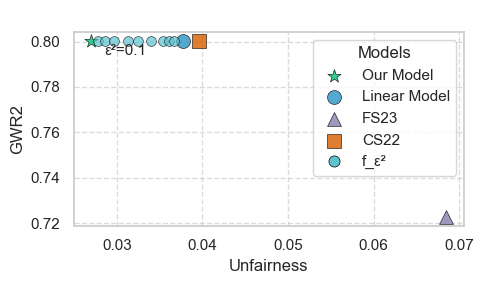

In [7]:
plot = Visualization.plot_approximate_fairness(t_results_no_bias,'ks_stat')

In [8]:
all_results, results_df_exp, test_dataset,pool_dataset, param_dictionnary=Data.run_experiment('t_unfair', no_bias_params_values, no_bias_params, False,False,True)

Processing t_unfair: 100%|██████████| 1/1 [00:05<00:00,  5.23s/it]


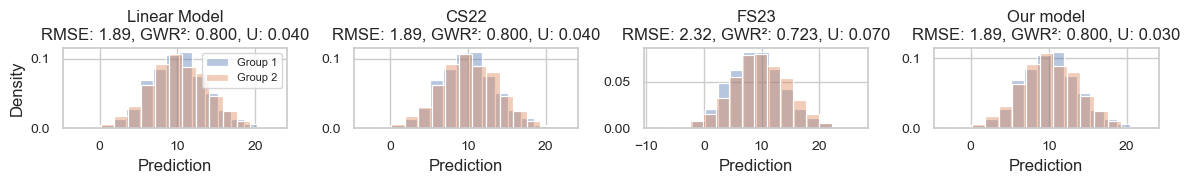

In [9]:
plot_no_bias_kstest = Visualization.plot_scores_densities(all_results[0],'ks_stat_mean',test_dataset_no_bias, save_path=None,)

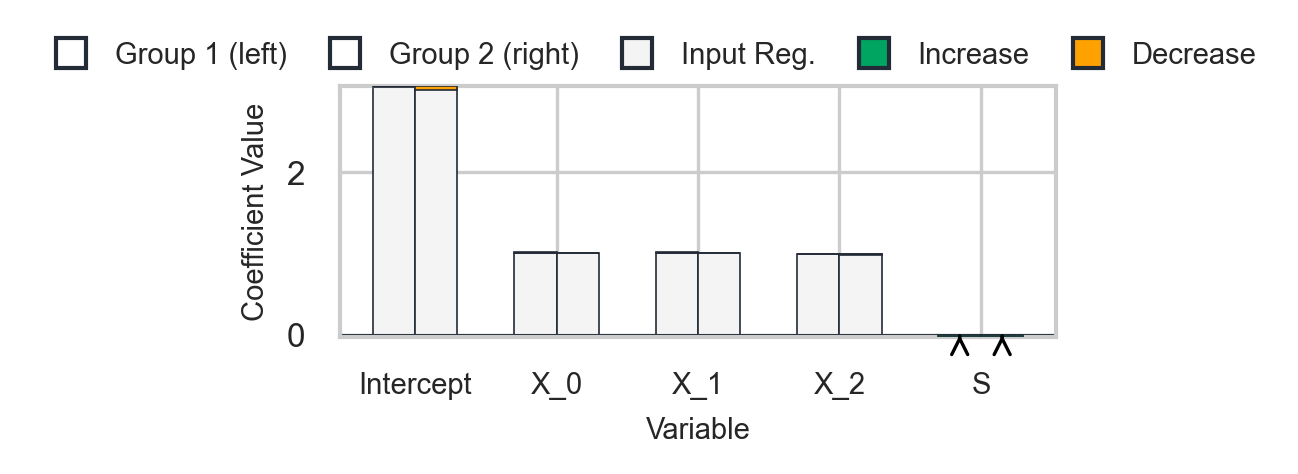

In [10]:
plot_coef_no_bias = Visualization.plot_fair_coefficient_evolution(t_results_no_bias, 3, 'Comparison of coef after remediation')

## 2) __Direct bias__ experiment

In [11]:
direct_params = current_params.copy()
direct_params.update({
    'random_seed': 7,
    't_unfair': 3,  
    'T_mean': 0,
    'T_std': 0,
    't_correl':0
})
direct_params_values = [3]

In [12]:
t_results_direct, test_dataset_direct=Data.run_experiment('t_unfair', direct_params_values, direct_params, True,False,True)
all_results_direct, results_df_DIRECT, test_dataset,pool_dataset, param_dictionnary=Data.run_experiment('t_unfair', direct_params_values, direct_params, False,False,True)

Processing t_unfair: 100%|██████████| 1/1 [00:04<00:00,  4.13s/it]


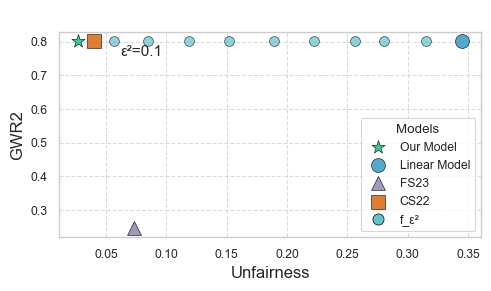

In [13]:
plot = Visualization.plot_approximate_fairness(t_results_direct,'ks_stat')

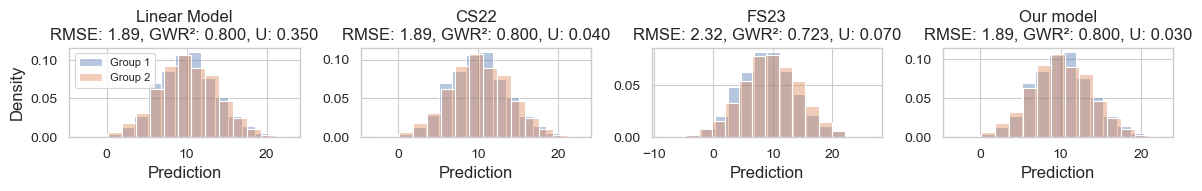

In [14]:
plot_direct_bias_kstest = Visualization.plot_scores_densities(all_results_direct[3],'ks_stat_mean',test_dataset_no_bias, save_path=None,)

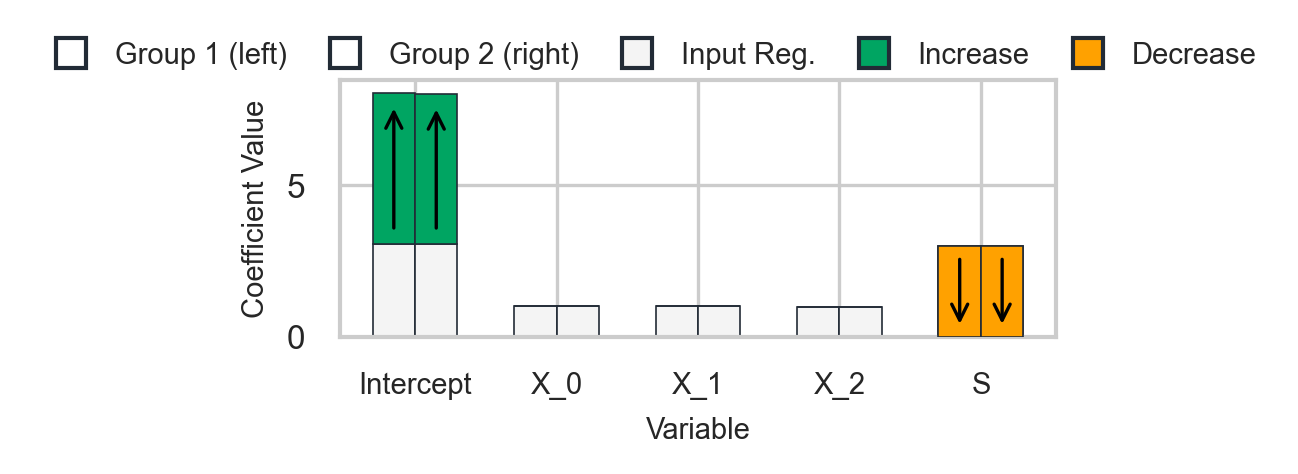

In [15]:
plot_coef_direct_bias= Visualization.plot_fair_coefficient_evolution(t_results_direct, 3, 'Comparison of coef after remediation')

## 3) __Direct and Indirect biases through the mean__ experiment  

In [16]:
direct_mu_params = current_params.copy()
direct_mu_params.update({
    'random_seed': 7,
    't_unfair': 3,  
    'T_mean': 2,
    'T_std': 0,
    't_correl':0
})
direct_mu_params_values = [3]

In [17]:
t_results_direct_mu, test_dataset_direct_mu =Data.run_experiment('t_unfair', direct_mu_params_values, direct_mu_params, True,False,True)

Processing t_unfair:   0%|          | 0/1 [00:06<?, ?it/s]


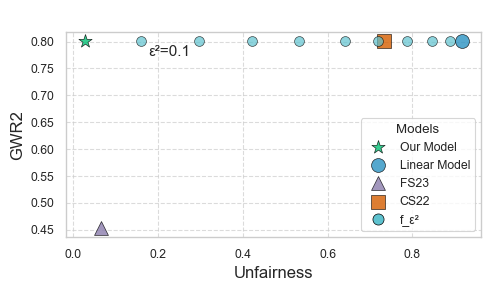

In [18]:
plot = Visualization.plot_approximate_fairness(t_results_direct_mu,'ks_stat')

In [19]:
all_results_mu, results_df_mu, test_dataset_mu,pool_dataset_mu, param_dictionnary_mu=Data.run_experiment('t_unfair', direct_mu_params_values, direct_mu_params, False,False,True)

Processing t_unfair: 100%|██████████| 1/1 [00:05<00:00,  5.05s/it]


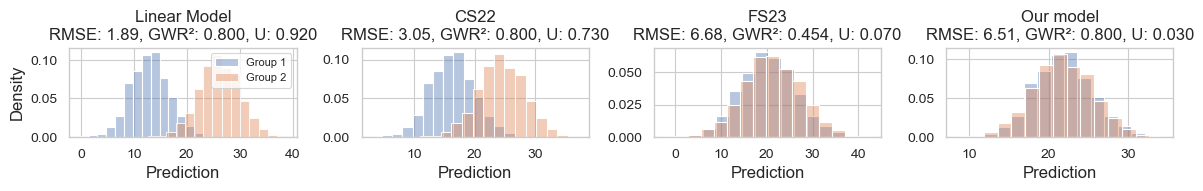

In [20]:
plot_direct_mu_bias_kstest = Visualization.plot_scores_densities(all_results_mu[3],'ks_stat_mean',test_dataset_direct_mu, save_path=None,)

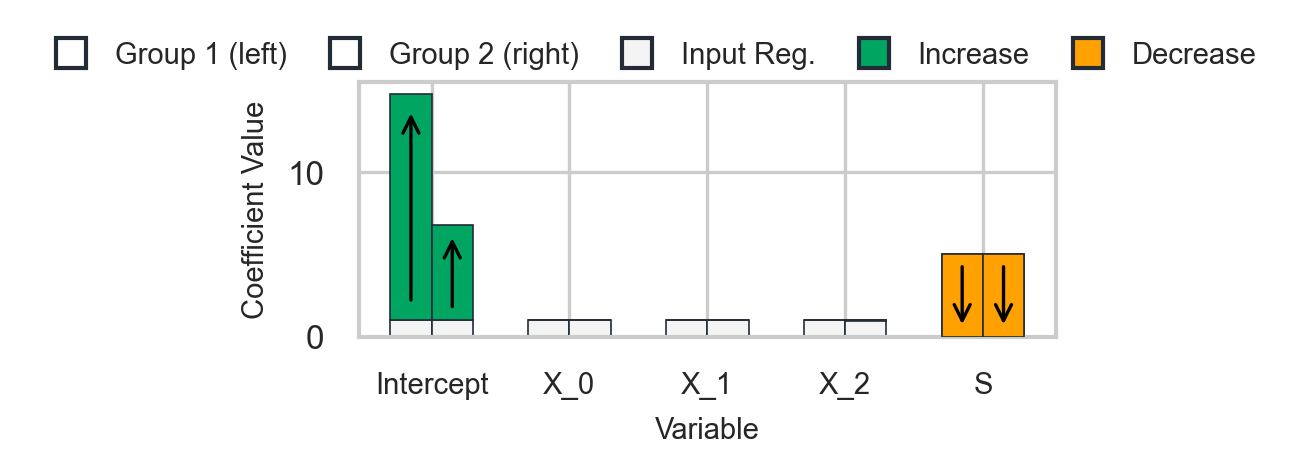

In [21]:
plot_coef_direct_indirect_through_mean= Visualization.plot_fair_coefficient_evolution(t_results_direct_mu, 3, 'Comparison of coef after remediation')

## 4) __Indirect bias through the std__ experiment

In [22]:
mean_std_bias_params = current_params.copy()
mean_std_bias_params.update({
    'random_seed': 7,
    't_unfair': 3, 
    'T_mean': 5,
    'T_std': 3, 
    't_correl':0.9,
})
mean_std_bias_params_values= [3]

In [23]:
t_results_mean_std_bias, test_dataset_mean_std_bias=Data.run_experiment('t_unfair', mean_std_bias_params_values, mean_std_bias_params, True,False,True)

Processing t_unfair:   0%|          | 0/1 [00:05<?, ?it/s]


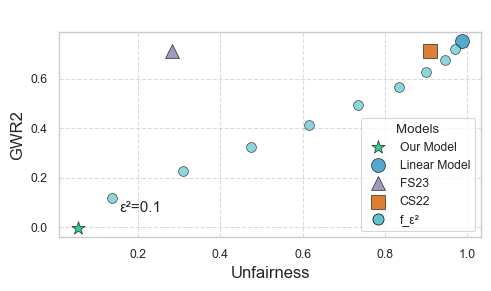

In [24]:
plot = Visualization.plot_approximate_fairness(t_results_mean_std_bias,'ks_stat')

In [25]:
all_results_mean_std, results_df_exp_mean_std, test_dataset_mean_std,pool_dataset_mean_std, param_dictionnary_mean_std=Data.run_experiment(
    varying_param='t_unfair', 
    param_values=mean_std_bias_params_values, 
    fixed_params=mean_std_bias_params, 
    coefficients_analysis=False,
    bool_coef=0.5, 
    bool_approximate_fairness=True)
# marginal_contribution_mean_std = pd.DataFrame(calculate_marginal_contributions(test_dataset_mean_std, X_features, 'S', param_dictionnary_mean_std))

Processing t_unfair: 100%|██████████| 1/1 [00:16<00:00, 16.33s/it]


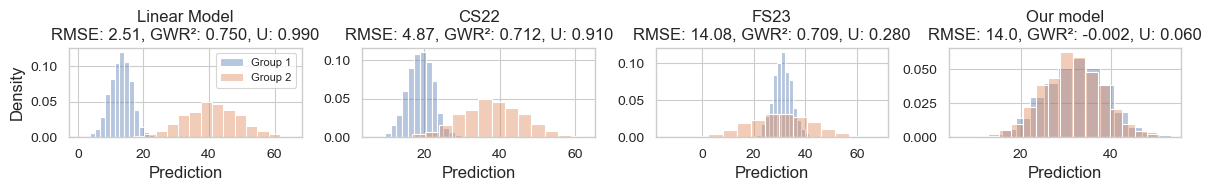

In [26]:
plot_direct_mu_std_bias_kstest = Visualization.plot_scores_densities(all_results_mean_std[3],'ks_stat_mean',test_dataset_mean_std, save_path=None,)

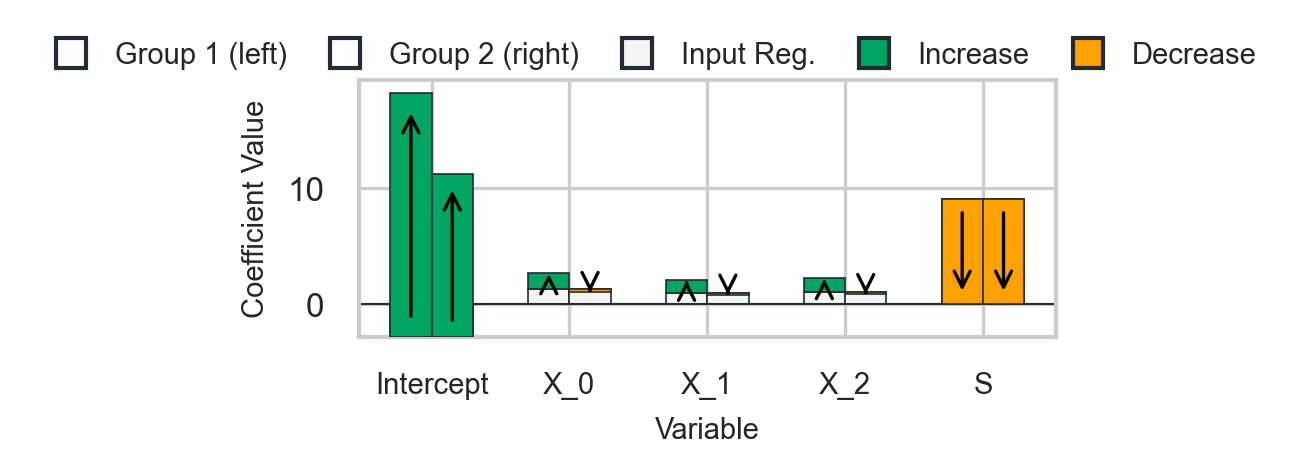

In [27]:
plot_coef_direct_and_indirect = Visualization.plot_fair_coefficient_evolution(t_results_mean_std_bias, 3, 'Comparison of coef after remediation')

## 5) __All type of biases__ experiment  

In [28]:
all_bias_params = current_params.copy()
all_bias_params.update({
    'random_seed': 7,
    't_unfair': 3,  #set to 10 with all_bias_params_values
    'T_mean': 2,
    'T_std': 3, 
    't_correl':0.7, 
})
all_bias_params_values= [10]

In [29]:
t_results_all_bias, test_dataset_all_bias=Data.run_experiment('t_unfair', all_bias_params_values, all_bias_params, True,False,True)

Processing t_unfair:   0%|          | 0/1 [00:08<?, ?it/s]


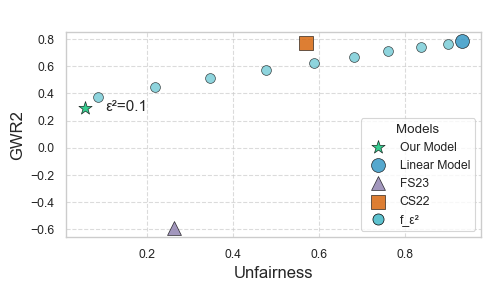

In [30]:
plot = Visualization.plot_approximate_fairness(t_results_all_bias,'ks_stat')

In [31]:
all_results_std, results_df_exp_std, test_dataset_std,pool_dataset_std, param_dictionnary_std=Data.run_experiment(
    varying_param='t_unfair', 
    param_values=[3], #t_unfair set to 3
    fixed_params=all_bias_params, 
    coefficients_analysis=False,
    bool_coef=0.7, 
    bool_approximate_fairness=True)

Processing t_unfair: 100%|██████████| 1/1 [00:05<00:00,  5.78s/it]


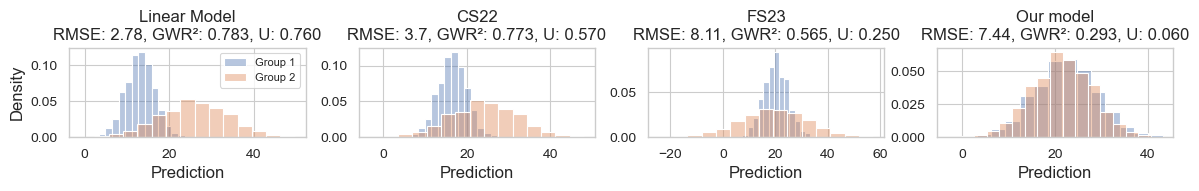

In [32]:
plot_direct_mu_std_corr_bias_kstest = Visualization.plot_scores_densities(all_results_std[3],'ks_stat_mean',test_dataset_std, save_path=None,)

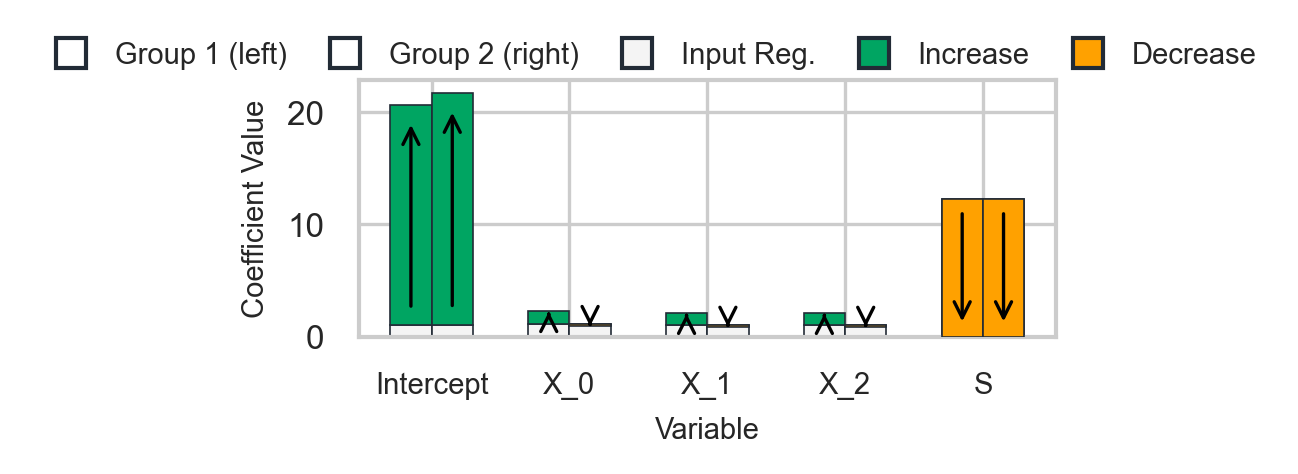

In [33]:
plot_all_biases = Visualization.plot_fair_coefficient_evolution(t_results_all_bias, 3, 'Comparison of coef after remediation')

### 6) Robustness of methodologies to increasing bias

In [34]:
all_bias_params['t_correl']=0.7
all_bias_params['T_std']=2
all_bias_params['T_mean']=2
all_bias_params['t_unfair']=10
all_bias_params

{'y': 'Y',
 'S_variable': 'S',
 'additional_s': 0,
 'tho': 0.6,
 'nb_features': 5,
 'nb_obs': 20000,
 'n_simulations': 1,
 'random_seed': 7,
 't_unfair': 10,
 't_correl': 0.7,
 'T_mean': 2,
 'T_std': 2}

6.a. Varying t_unfair with fixed params T=(T_y,T_mean,T_std,T_corr)=(*,2,3,0.7)

In [35]:
t_y_results, results_df_exp, test_dataset,pool_dataset, param_dictionnary=Data.run_experiment(
    varying_param='t_unfair', 
    param_values=[0,3,6,9,12,15], 
    fixed_params=all_bias_params, 
    coefficients_analysis=False,
    bool_coef=True, 
    bool_approximate_fairness=False)

Processing t_unfair: 100%|██████████| 6/6 [00:27<00:00,  4.67s/it]


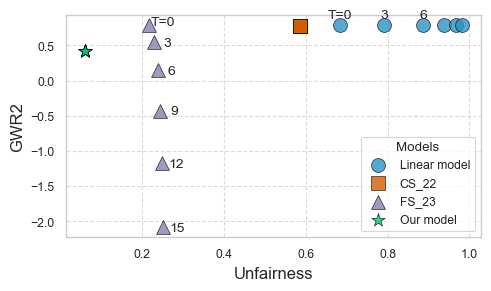

In [36]:
plot = Visualization.plot_unfairness_drifts(t_y_results, [0,3,6,9,12,15], 'GWR2','ks_stat')

6.b. Varying T_corr with fixed params T=(T_y,T_mean,T_std,T_corr)=(10,2,3,*)

In [37]:
t_corr_results, results_df_exp, test_dataset,pool_dataset, param_dictionnary=Data.run_experiment(
    varying_param='t_correl', 
    param_values=[0,  0.3,  0.6,  0.9], 
    fixed_params=all_bias_params, 
    coefficients_analysis=False,
    bool_coef=True, 
    bool_approximate_fairness=False)

Processing t_correl: 100%|██████████| 4/4 [00:18<00:00,  4.60s/it]


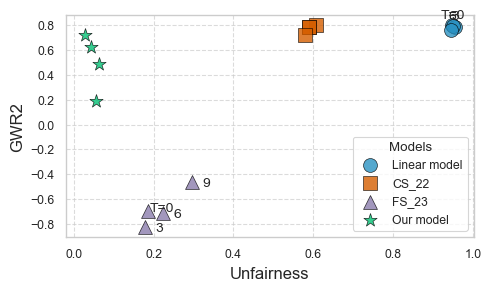

In [38]:
plot = Visualization.plot_unfairness_drifts(t_corr_results, [0,  0.3,  0.6,  0.9], 'GWR2','ks_stat')

## 7) Decomposing unfairness in Linear models

In [39]:
t_y_results, results_df_exp, test_dataset,pool_dataset, param_dictionnary=Data.run_experiment(
    varying_param='t_unfair', 
    param_values=[0,5,10], 
    fixed_params=all_bias_params, 
    coefficients_analysis=False,
    bool_coef=True, 
    bool_approximate_fairness=False)

Processing t_unfair: 100%|██████████| 3/3 [00:17<00:00,  6.00s/it]


In [40]:
t_corr_results, results_df_exp, test_dataset,pool_dataset, param_dictionnary=Data.run_experiment(
    varying_param='t_correl', 
    param_values=[0,  0.45,  0.9], 
    fixed_params=all_bias_params, 
    coefficients_analysis=False,
    bool_coef=True, 
    bool_approximate_fairness=False)

Processing t_correl: 100%|██████████| 3/3 [00:13<00:00,  4.64s/it]


In [41]:
t_std_results, results_df_exp, test_dataset,pool_dataset, param_dictionnary=Data.run_experiment(
    varying_param='T_std', 
    param_values=[1,25,50], 
    fixed_params=all_bias_params, 
    coefficients_analysis=False,
    bool_coef=True, 
    bool_approximate_fairness=False)

Processing T_std: 100%|██████████| 3/3 [00:12<00:00,  4.33s/it]


In [42]:
t_mu_results, results_df_exp, test_dataset,pool_dataset, param_dictionnary=Data.run_experiment(
    varying_param='T_mean', 
    param_values=[0,2,4], 
    fixed_params=all_bias_params, 
    coefficients_analysis=False,
    bool_coef=True, 
    bool_approximate_fairness=False)

# plot = plot_rmse_vs_unfairness(t_mu_results, [1,2,3,4,5,6,7], 'GWR2')

Processing T_mean: 100%|██████████| 3/3 [00:13<00:00,  4.39s/it]


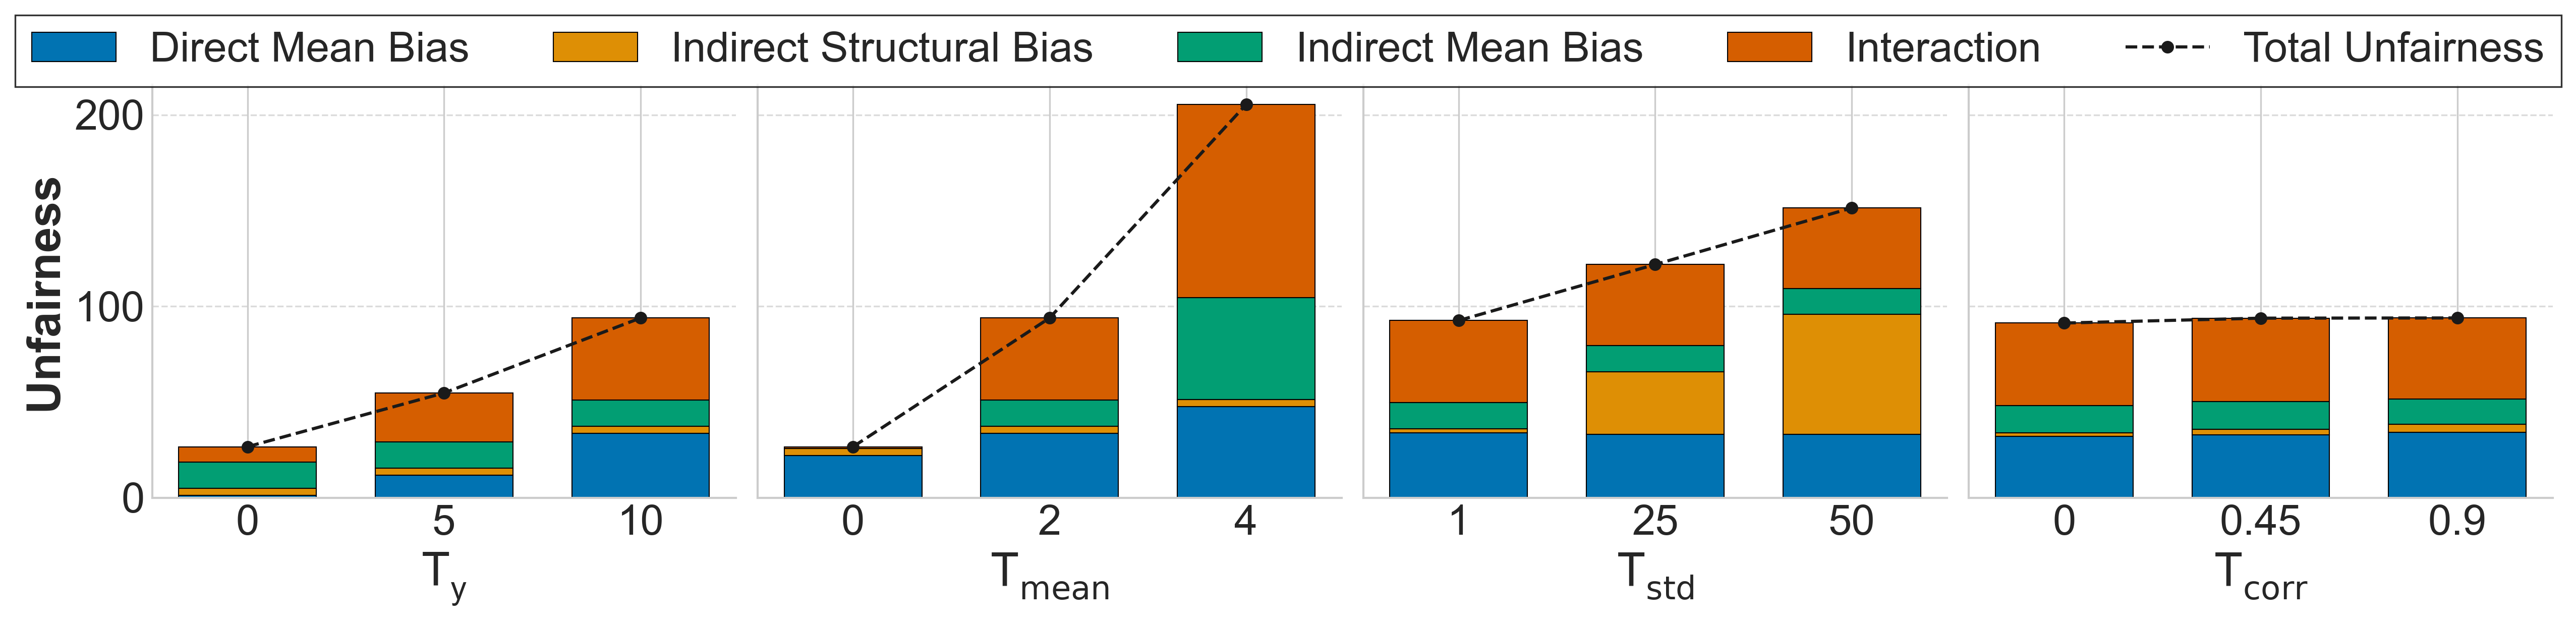

In [43]:
# Créer la figure combinée avec le rendu mathématique amélioré
plot = Visualization.plot_multiple_unfairness_decompositions(
    [t_y_results, t_mu_results, t_std_results, t_corr_results],
    ['t_unfair', 'T_mean', 'T_std', 't_correl'],
    [r'$T_y$', r'$T_{\mathrm{mean}}$', r'$T_{\mathrm{std}}$', r'$T_{\mathrm{corr}}$'],
    'unfairness_decomposition_combined.png'
)